In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Payload Path Integration Test Result')

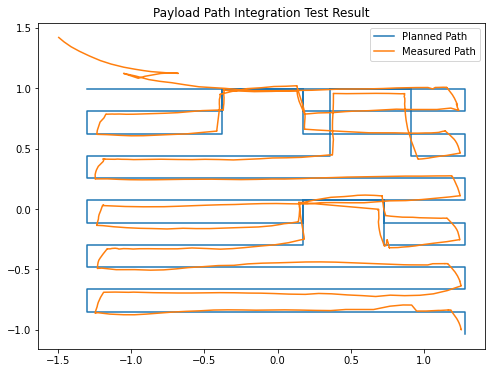

In [ ]:
real1 = pd.read_csv('/content/drive/MyDrive/University/CAPSTONE/RealPath1.csv')
real1.columns = ['x', 'y']
real1 = real1.loc[real1['x']>-1.5]
real2 = pd.read_csv('/content/drive/MyDrive/University/CAPSTONE/RealPath2.csv')
real2.columns = ['x', 'y']
real2 = real2.loc[120:].drop(real2.loc[144:146].index)

real = pd.concat([real1, real2])

plan = pd.read_csv('/content/drive/MyDrive/University/CAPSTONE/output1.csv')

s = 1.25
plt.figure(figsize=[6.4*s, 4.8*s])
plt.plot(plan['x'], plan['y'], label='Planned Path')
plt.plot(real['x'], real['y'], label='Measured Path')
plt.legend()
plt.title('Payload Path Integration Test Result')

In [ ]:
#Dec 8 1 GHz Scan Results

import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import cv2

# This is a folder with all the csv files you want in it

directory = "/content/drive/MyDrive/SERF CSV Files/Dec 8 Ice Test (2 Pigs)/Lineset"

dir1G = "/content/drive/MyDrive/University/CAPSTONE/CSV Scans of Jan 13 1GHz/Lineset"
dir500 = "/content/drive/MyDrive/University/CAPSTONE/Jan 13 CSV Files for 500HZz/Lineset"
ant = "1GHz Antenna"
date = "Jan 13, 2022"
scott_dir = dir1G
directory = scott_dir

csv_files = sorted(glob.glob(os.path.join(directory, "*.csv"))) # This line gets a sorted list of all csv files in the directory
dfs = [] # this will store the dataframes
for f in csv_files:
  dfs.append(pd.read_csv(f, skiprows=3, header=None).iloc[:,2:]) # read the csv using pd.read_csv and append it to the list of dataframes


In [ ]:
def get_corr(width, seperation):
  my_vals = []
  for i in range(len(dfs)):
    inter_val = [0]*(seperation)
    for j in range(len(dfs[i].columns)-seperation-width):
      x = dfs[i].iloc[:,j:j+width].mean(1)
      y = dfs[i].iloc[:,j+seperation:j+seperation+width].mean(1)
      corr = np.corrcoef(x,y)[0,1]
      inter_val.append(1-corr)
    # plt.plot(inter_val, label='Line {}'.format(i+1))
    my_vals.append(inter_val)
  return my_vals


[322 317 366 317]


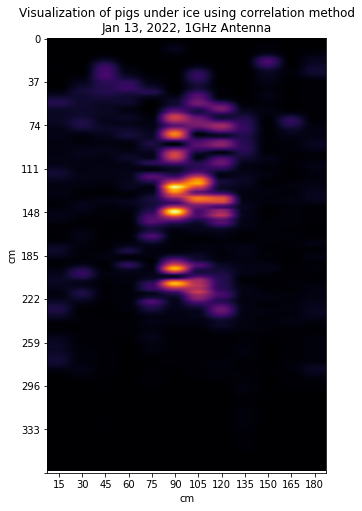

In [ ]:
def format_data(data):
  lens = np.array([len(d) for d in data])
  target_length = round(np.max(lens))
  ar_fixed = np.zeros((len(data), target_length), dtype=np.float32)
  print(lens[5:9])
  for i in range(len(data)):
    ar_fixed[i,:] = cv2.resize(np.array(data[i], dtype=np.float32), (1, target_length)).flatten()
  return ar_fixed
def display_heatmap(data, title='', axs=None):
  np.nan_to_num(data, copy=False)
  X = data.shape[0]
  Y = data.shape[1]
  ar2 = cv2.flip(data.T,1)
  ar2 = cv2.flip(ar2,0)
  if axs is None:
    plt.figure(figsize=(5,8))
    plt.imshow(ar2, cmap="inferno", aspect="auto")
    plt.title(title or "Visual representation of pigs under ice")
    plt.xlabel("cm")
    plt.ylabel("cm")
    _ = plt.xticks(range(X), 15*np.arange(1,X+1))
    _ = plt.yticks(np.linspace(0,Y+1,num=11),['{:.0f}'.format(a) for a in np.linspace(0,370, num=11)[:-1]])
  else:
    axs.imshow(ar2, cmap="inferno", aspect="auto")
width = 10
seperation = 10
my_vals = get_corr(width, seperation)
my_array = format_data(my_vals)
# fig, ax = plt.subplots(2, constrained_layout=True)
# for i,d in enumerate(my_vals,1):
#   ax[0].plot(d, label='line {}'.format(i))
# ax[0].set_title("unchanged data")
# for i,d in enumerate(my_array,1):
#   ax[1].plot(d, label='line {}'.format(i))
# ax[1].set_title("stretched data")

display_heatmap(my_array, title="Visualization of pigs under ice using correlation method\n{}, {}".format(date,ant))


[331 326 375 326]
[331 326 375 326]
[331 326 375 326]
[331 326 375 326]
[331 326 375 326]
[327 322 371 322]
[327 322 371 322]
[327 322 371 322]
[327 322 371 322]
[327 322 371 322]
[322 317 366 317]
[322 317 366 317]
[322 317 366 317]
[322 317 366 317]
[322 317 366 317]
[312 307 356 307]
[312 307 356 307]
[312 307 356 307]
[312 307 356 307]
[312 307 356 307]
[282 277 326 277]
[282 277 326 277]
[282 277 326 277]
[282 277 326 277]
[282 277 326 277]


Text(0.5, 0.98, 'Correlation data for pigs under ice\nJan 13, 2022, 1GHz Antenna')

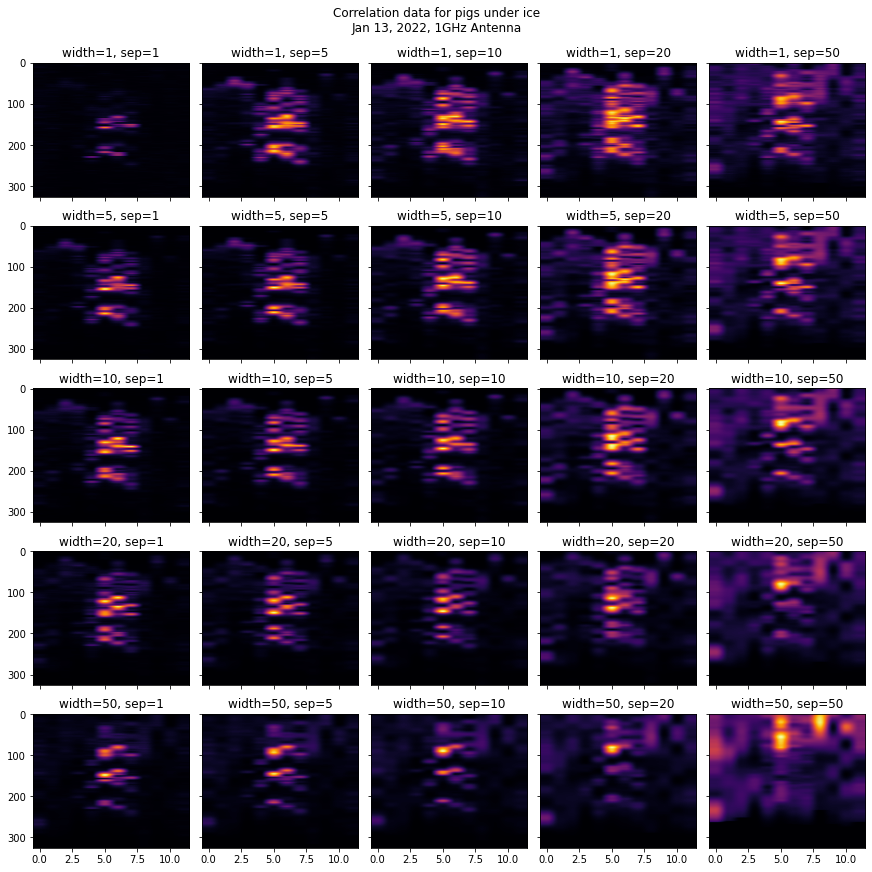

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(12,12), sharex=True, sharey=True, constrained_layout=True)
widths = [1, 5, 10, 20, 50]
seperations = [1, 5, 10, 20, 50]
for i in range(len(widths)):
  for j in range(len(seperations)):
    data = get_corr(widths[i], seperations[j])
    data_f = format_data(data)
    display_heatmap(data_f, axs=axs[i,j])
    axs[i,j].set_title('width={}, sep={}'.format(widths[i], seperations[j]))
fig.suptitle('Correlation data for pigs under ice\n{}, {}'.format(date, ant))

[332 327 376 327]


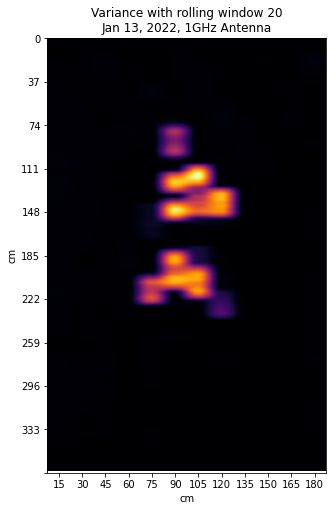

In [ ]:
vars = [df.abs().max(axis=0).rolling(20).var() for df in dfs]
vars_f = format_data(vars)
display_heatmap(vars_f, title="Variance with rolling window 20\n{}, {}".format(date,ant))

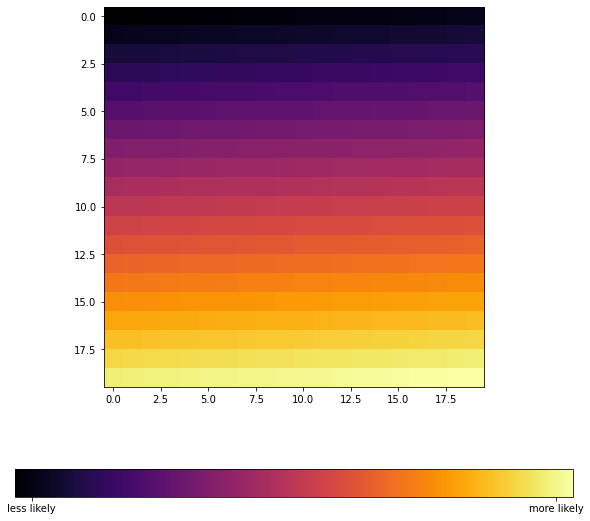

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.linspace(0,1,400).reshape(20,20), cmap='inferno')
cbar = plt.colorbar(cmap='inferno', orientation='horizontal', ticks=[0.03, 0.97])
cbar.set_ticklabels(['less likely', 'more likely'])

In [ ]:
# This is a folder with all the csv files you want in it
dir1G = "/content/drive/MyDrive/University/CAPSTONE/CSV Scans of Jan 13 1GHz/Lineset"
dir500 = "/content/drive/MyDrive/Capstone /Data Sets/Jan 13 CSV Files for 500HZz/Lineset"

dir = dir500

csv_files = sorted(glob.glob(os.path.join(dir, "*.csv")))
dfs = []
for i,f in enumerate(csv_files):
  dfs.append(pd.read_csv(f, skiprows=3, header=None).iloc[:,2:])
# The rest is plotting:
fig, axs = plt.subplots(len(dfs), figsize=(5,20), constrained_layout=True)
counter = 1
for ax, data in zip(axs, dfs):
  ax.imshow(data.values, cmap="gray")
  ax.set_title(counter)
  counter+=1

<Figure size 360x1440 with 0 Axes>

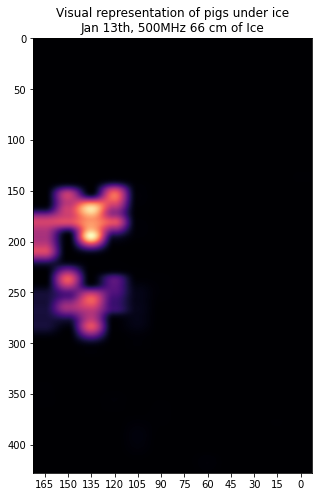

In [ ]:
ar2 = cv2.flip(ar_fixed, 1)
plt.figure(figsize=(5,8))
plt.imshow(ar2,cmap = 'magma', aspect="auto")
plt.title("Visual representation of pigs under ice\nJan 13th, 500MHz 66 cm of Ice")
_=plt.xticks(range(12), 15*np.arange(11,-1,-1))

Text(0.5, 1.0, 'Correlation Approach\nWidth=10, Seperation=10')

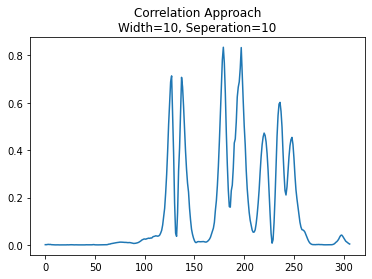

In [ ]:
some_data = my_vals[6]
# dfs[9].abs().max(axis=0).plot()

# fig, axs = plt.subplots(2, sharex=True, figsize=(6,10), constrained_layout=True)
# axs[0].imshow(dfs[6], cmap='gray')
plt.plot(some_data)
# axs[0].set_xlim((0,327))
# axs[0].set_title('GPR Image')
plt.title('Correlation Approach\nWidth=10, Seperation=10')
# axs[1].set_xlim((0,327))

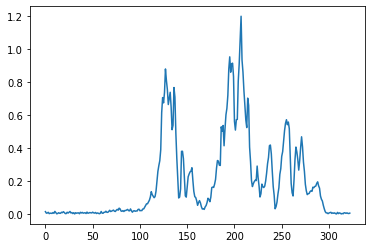

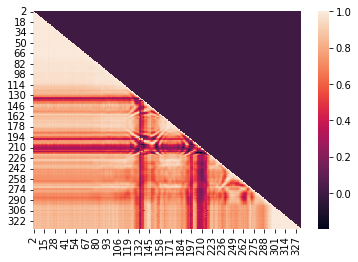

In [ ]:
import pandas as pd
import seaborn as sns
fname = '/content/drive/MyDrive/SERF CSV Files/Jan 13th 1GHz Ice Test (3 Pigs)/CSV Scans of Jan 13 1GHz/Lineset/Line1 7-ch2.csv'

#fname = scott_fname



# skiprows = 3, skips 3 rows for the header
# header = None, just uses index # for dataframe's header
# .iloc[:,2:], skips the first 2 columns
# pd.read_csv returns a pandas dataframe, if you want a 2d numpy array use df.values
gpr_data = pd.read_csv(fname, skiprows=3, header=None).iloc[:,2:]
corrmatrix = gpr_data.corr() # This is a dataframe

# Get just the values from the dataframe and ar_1 will be an matrix array
ar_1 = gpr_data.values


 
n = 1
ii = 0 
jj = 0
check = False

desiredmatrix = gpr_data.iloc[::n, ::n].corr() #This will take the nth rows versus nth row correlation

#This block of code below will remove the dupilicates of the data frame
for ii in range(len(desiredmatrix.index)):
  for jj in range(len(desiredmatrix.columns)):
    if ii == jj:
      check = True
    if (check == True and ii != jj):
      desiredmatrix.iloc[ii,jj] = 0
    if jj == (len(desiredmatrix.index)-1):
      check = False










#Different Style of Parser which will take n+1th and n+1th on the i+1th iteration
start_val = 0
end_val = 10
i = start_val
T = end_val - 1
my_vals = []

for ii in range(len(gpr_data.columns)):
  if T <= (len(gpr_data.columns)-1):
    my_vals.append(1-gpr_data.corr().iloc[i,T])
    i = i+1
    T = T+1

plt.plot(my_vals)
plt.show()
print("")

# plot heatmap of our customized desired Matrix
ax = sns.heatmap(desiredmatrix)
print("")


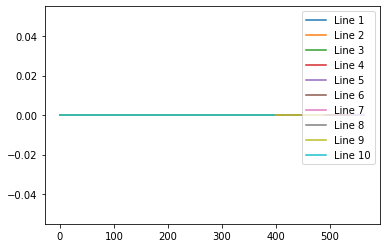

In [ ]:
#Jan 8 1 GHz Scan Results 


import os
import glob
import pandas as pd
# This is a folder with all the csv files you want in it
directory = "/content/drive/MyDrive/SERF CSV Files/Dec 8 Ice Test (2 Pigs)/Lineset"

csv_files = sorted(glob.glob(os.path.join(directory, "*.csv"))) # This line gets a sorted list of all csv files in the directory
dfs = [] # this will store the dataframes
for f in csv_files:
  dfs.append(pd.read_csv(f, skiprows=3, header=None).iloc[:,2:]) # read the csv using pd.read_csv and append it to the list of dataframes

#Different Style of Parser which will take n+1th and n+1th on the i+1th iteration
start_val = 0
end_val = 1
jj = 0 # This is the starting value of the dataframe of dataframes
i = start_val
T = end_val - 1
my_vals = []
inter_val = []
counter_1 = 0
stopper = False 

for jj in range(len(dfs)):
  inter_val = []
  for ii in range(len(dfs[jj].columns)):
    if T <= (len(dfs[jj].columns)-1):
      inter_val.append(1-dfs[jj].corr().iloc[i,T])
      i = i+1
      T = T+1
    elif T == len(dfs[jj].columns):
      i = start_val
      T = end_val - 1
  plt.plot(inter_val, label='Line {}'.format(jj+1))
  my_vals.append(inter_val)    
plt.legend()


